# Google Earth Engine
Alexander Bedine  
ajb20dd@fsu.edu  
November 1, 2024

## Table of Contents

 - [Environment Setup](#environment-setup)
 - [Google Earth Maps and Zonal Stats](#google-earth-maps-and-zonal-stats)
 - [Ranking States by Elevation](#ranking-states-by-elevation)
 - [Mean Elevation Map](#mean-elevation-map)

### Environment Setup

In [1]:
import ee
import geemap
import pandas as pd
import geopandas as gpd

In [2]:
ee.Authenticate()

True

### Google Earth Maps and Zonal Stats

In [3]:
Map = geemap.Map(center=(40, -100), zoom=3)

USGS_3DEP_10m = ee.Image("USGS/3DEP/10m")
elevation = USGS_3DEP_10m.select('elevation')
viz = {
    'min': 0,
    'max': 3000,
    'palette': ['3ae237', 'b5e22e', 'd6e21f', 'fff705', 'ffd611', 'ffb613', 'ff8b13',
    'ff6e08', 'ff500d', 'ff0000', 'de0101', 'c21301', '0602ff', '235cb1',
    '307ef3', '269db1', '30c8e2', '32d3ef', '3be285', '3ff38f', '86e26f']
}

Map.addLayer(elevation, viz, 'elevation')
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

Create a Map using the USGS DEM that shows the elevation of the United States.

In [4]:
us_states = ee.FeatureCollection("TIGER/2018/States")
Map.addLayer(us_states, {'opacity': 0.7}, "US States")
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

add the boundaries for US States based on the 2018 Census to the map.

In [5]:
geemap.zonal_stats(elevation, us_states, "elevresults.geojson", stat_type="MEAN")

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to c:\Users\alexb\Documents\GIS5103\GIS5103\assignments\elevresults.geojson


In [6]:
elevresults = gpd.read_file("elevresults.geojson") 
elevresults.head()

,id,mean,STATENS,GEOID,AWATER,LSAD,STUSPS,STATEFP,FUNCSTAT,INTPTLAT,DIVISION,REGION,NAME,INTPTLON,MTFCC,ALAND,geometry
0,00000000000000000022,14.883586,01802710,78,1550236201,00,VI,78,A,+18.3267480,0,9,United States Virgin Islands,-064.9712508,G4000,348021896,"MULTIPOLYGON (((-64.95671 17.67899, -64.95649 ..."
1,00000000000000000023,27.111721,01779809,69,4644252461,00,MP,69,A,+14.9367835,0,9,Commonwealth of the Northern Mariana Islands,+145.6010210,G4000,472292529,"MULTIPOLYGON (((146.00197 16.02877, 146.00224 ..."
2,00000000000000000024,89.677631,01802705,66,934337453,00,GU,66,A,+13.4382886,0,9,Guam,+144.7729493,G4000,543555840,"POLYGON ((144.56342 13.44807, 144.56355 13.445..."
3,00000000000000000029,43.026537,01802701,60,1307243754,00,AS,60,A,-14.2671590,0,9,American Samoa,-170.6682674,G4000,197759063,GEOMETRYCOLLECTION (LINESTRING (-170.8231 -14....
4,00000000000000000031,155.109137,01779808,72,4922382562,00,PR,72,A,+18.2176480,0,9,Puerto Rico,-066.4107992,G4000,8868896030,"MULTIPOLYGON (((-67.54302 18.38613, -67.54244 ..."


We now have a dataframe that has every state and the mean elevation for that state.

### Ranking States by Elevation

In [7]:
continental_us_results = elevresults.drop([0, 1, 2, 3, 4, 54, 55])
#continental_us_results    # Verify the new dataframe

First thing we are going to do is create a new dataframe that drops HI, AK, and US Territories that are not on the mainland.  
We do this for mapping purposes later as having the extra states becomes problematic for showcasing a map in Python.

In [20]:
ranked_elev = continental_us_results.sort_values("mean", axis=0, ascending=False)

we are making a ranked dataframe from the previous one that orders the dataframe by the elevation of the states.

In [21]:
ranked_elev = ranked_elev.rename(columns={"mean": "Mean Elevation", "STUSPS": "State"})
ranked_elev["Rank"] = ranked_elev['Mean Elevation'].rank(method='min', ascending=False).astype(int)

We do some column renaming here and add a "Rank" column.

In [24]:
ranked_elev = ranked_elev[["Rank", "State", "Mean Elevation"]]
ranked_elev.head(5).style.format({"Mean Elevation": "{:.2f} m"}).hide(axis='index')

Rank,State,Mean Elevation
1,CO,2090.83 m
2,WY,1947.70 m
3,UT,1833.04 m
4,NM,1764.20 m
5,NV,1688.56 m


Here is our final **Ranking Table** for the top 5 states!  
Colorado, Wyoming, Utah, New Mexico, and Nevada.

### Mean Elevation Map

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import mapclassify
from legendgram import legendgram
import palettable.matplotlib as palmpl
from palettable.cartocolors.sequential import SunsetDark_7
import matplotlib
from matplotlib.colors import ListedColormap

import some stuff for mapping purposes.

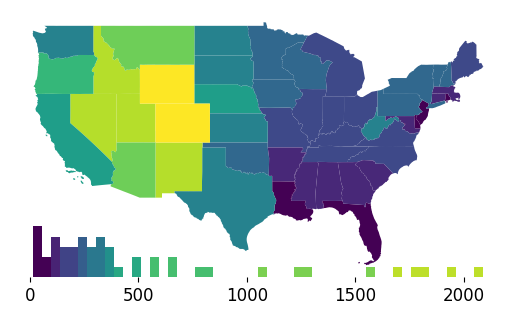

In [62]:
f,ax = plt.subplots()


continental_us_results.plot('mean', k=10, ax=ax, scheme='naturalbreaks')


#bins returns the steps
bins = mapclassify.Quantiles(continental_us_results['mean'], k=10).bins

legendgram(f,ax,continental_us_results['mean'],bins,pal=palmpl.Viridis_10,
           
          legend_size=(1, 0.2), # legend size in fractions of the axis
           
           loc = 'lower left', # matplotlib-style legend locations
           
           )


ax.axis('off');